In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, seaborn as sns
import scipy
import warnings
import plotly.express as px
import statsmodels.api as sm
from itertools import product
from tqdm import tqdm
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\Divyanshu Chaudhari\Downloads\country_vaccinations_new.csv')

In [3]:
df.tail()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
18759,Zimbabwe,ZWE,2021-05-14,775241.0,571460.0,203781.0,23221.0,19211.0,5.22,3.84,1.37,1293.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1394757158...
18760,Zimbabwe,ZWE,2021-05-15,793311.0,579769.0,213542.0,18070.0,19353.0,5.34,3.90,1.44,1302.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1394757158...
18761,Zimbabwe,ZWE,2021-05-16,796947.0,581615.0,215332.0,3636.0,16101.0,5.36,3.91,1.45,1083.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1394757158...
18762,Zimbabwe,ZWE,2021-05-17,814258.0,591808.0,222450.0,17311.0,17658.0,5.48,3.98,1.50,1188.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1394757158...
18763,Zimbabwe,ZWE,2021-05-18,831954.0,600579.0,231375.0,17696.0,17455.0,5.60,4.04,1.56,1174.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1394757158...


In [4]:
df.head(5)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/


# Data Cleaning

In [5]:
df.columns

Index(['country', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million',
       'vaccines', 'source_name', 'source_website'],
      dtype='object')

In [6]:
df.isnull().sum()

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                      7969
people_vaccinated                       8726
people_fully_vaccinated                11097
daily_vaccinations_raw                  9766
daily_vaccinations                       213
total_vaccinations_per_hundred          7969
people_vaccinated_per_hundred           8726
people_fully_vaccinated_per_hundred    11097
daily_vaccinations_per_million           213
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64

In [7]:
df.shape

(18764, 15)

In [8]:
#Droppin total_vaccinations missing data, as without this value any raw doesn't make much sense.
df = df.drop(df[df.total_vaccinations.isna()].index)

In [9]:
df.shape

(10795, 15)

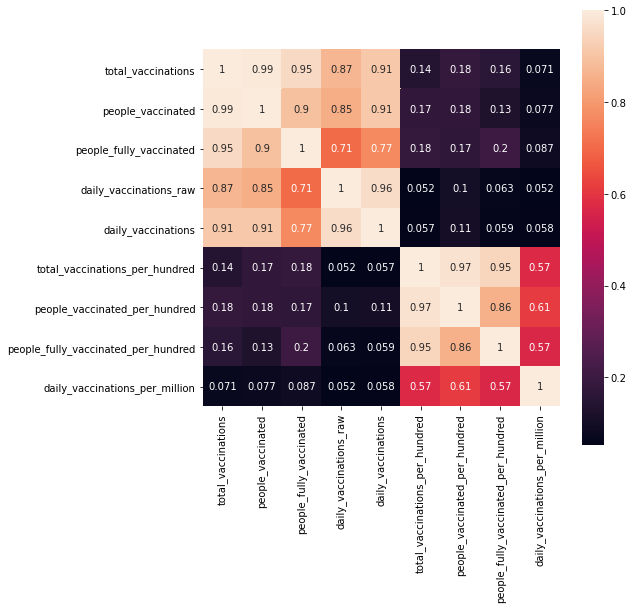

In [10]:
plt.subplots(figsize=(8, 8))
sns.heatmap(df.corr(), annot=True, square=True)
plt.show()

The values of total_vaccinations column are strongly correlated with people_vaccinated column's.4

In [11]:
df.isna().sum()

country                                   0
iso_code                                  0
date                                      0
total_vaccinations                        0
people_vaccinated                       844
people_fully_vaccinated                3129
daily_vaccinations_raw                 1797
daily_vaccinations                      211
total_vaccinations_per_hundred            0
people_vaccinated_per_hundred           844
people_fully_vaccinated_per_hundred    3129
daily_vaccinations_per_million          211
vaccines                                  0
source_name                               0
source_website                            0
dtype: int64

In [12]:
#df_copy = df.copy()

In [13]:
#df_copy = df_copy.drop(df_copy[df_copy.people_vaccinated.isna()].index)

In [14]:
#Let's check the hypothesis that these columns distributions are the same.
#We will use Mann-Whithey U test for this goal.

In [15]:
scipy.stats.mannwhitneyu(df.total_vaccinations, df.people_vaccinated, alternative='two-sided')

MannwhitneyuResult(statistic=56890750.5, pvalue=0.0026695698080454987)

As p-value is less than 0.05, which means we reject our hyphotesis.
So, we will fill the missing values with 0.

In [16]:
df.people_vaccinated = df.people_vaccinated.fillna(0)

In [17]:
df.isna().sum()

country                                   0
iso_code                                  0
date                                      0
total_vaccinations                        0
people_vaccinated                         0
people_fully_vaccinated                3129
daily_vaccinations_raw                 1797
daily_vaccinations                      211
total_vaccinations_per_hundred            0
people_vaccinated_per_hundred           844
people_fully_vaccinated_per_hundred    3129
daily_vaccinations_per_million          211
vaccines                                  0
source_name                               0
source_website                            0
dtype: int64

Other Strong correlations that we identify from the above heatmap are:

2.total_vaccinations_per_hundred vs people_vaccinated_per_hundred
3.daily_vaccinations vs  people_vaccinated
4.daily_vaccinations_per_million vs people_vaccinated_per_hundred
5.people_fully_vaccinated vs  total_vaccinations
6.people_fully_vaccinated_per_hundred vs total_vaccinations_per_hundred
7.daily_vaccinations_raw vs daily_vaccinations

In [18]:
scipy.stats.mannwhitneyu(df.total_vaccinations_per_hundred, df.people_vaccinated_per_hundred, alternative='two-sided')

MannwhitneyuResult(statistic=57905856.5, pvalue=0.4315482792032509)

In [19]:
#df.people_vaccinated_per_hundred = df.people_vaccinated_per_hundred.fillna(0)
diff_per_hundred = df.total_vaccinations_per_hundred.mean() - df.people_vaccinated_per_hundred.mean()
df.people_vaccinated_per_hundred = df.people_vaccinated_per_hundred.fillna(df.total_vaccinations_per_hundred - diff_per_hundred)

In [20]:
scipy.stats.mannwhitneyu(df.daily_vaccinations, df.people_vaccinated, alternative='two-sided')

MannwhitneyuResult(statistic=29366750.0, pvalue=0.0)

In [21]:
df.daily_vaccinations = df.daily_vaccinations.fillna(0)

In [22]:
scipy.stats.mannwhitneyu(df.daily_vaccinations_per_million, df.people_vaccinated_per_hundred, alternative='two-sided')

MannwhitneyuResult(statistic=114912595.5, pvalue=0.0)

In [23]:
df.daily_vaccinations_per_million = df.daily_vaccinations_per_million.fillna(0)

In [24]:
scipy.stats.mannwhitneyu(df.people_fully_vaccinated, df.total_vaccinations, alternative='two-sided')

MannwhitneyuResult(statistic=66328301.0, pvalue=2.169668356818736e-69)

In [25]:
df.people_fully_vaccinated = df.people_fully_vaccinated.fillna(0)

In [26]:
scipy.stats.mannwhitneyu(df.people_fully_vaccinated_per_hundred, df.total_vaccinations_per_hundred, alternative='two-sided')

MannwhitneyuResult(statistic=62889277.0, pvalue=5.70888857535949e-24)

In [27]:
df.people_fully_vaccinated_per_hundred = df.people_fully_vaccinated_per_hundred.fillna(0)

In [28]:
scipy.stats.mannwhitneyu(df.daily_vaccinations_raw, df.daily_vaccinations, alternative='two-sided')

MannwhitneyuResult(statistic=70580864.0, pvalue=2.5516766302881847e-159)

In [29]:
df.daily_vaccinations_raw = df.daily_vaccinations_raw.fillna(0)

In [30]:
df.isna().sum()

country                                0
iso_code                               0
date                                   0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
daily_vaccinations_raw                 0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
daily_vaccinations_per_million         0
vaccines                               0
source_name                            0
source_website                         0
dtype: int64

In [31]:
df.shape

(10795, 15)

## How the vaccinations progress changes over time

In [32]:
t_cols = ['date', 'total_vaccinations']
timeseries_cov = df[t_cols].groupby('date').sum()[4:-1]

def invboxcox(y, l):
    if l == 0:
        return np.exp(y)
    else:
        return np.exp(np.log(l*y+1)/l)
    
print(timeseries_cov)

            total_vaccinations
date                          
2020-12-06        2.000000e+00
2020-12-07        4.000000e+00
2020-12-08        4.000000e+00
2020-12-09        5.000000e+00
2020-12-10        6.000000e+00
...                        ...
2021-05-13        1.394810e+09
2021-05-14        1.376011e+09
2021-05-15        1.380323e+09
2021-05-16        1.465803e+09
2021-05-17        1.497409e+09

[163 rows x 1 columns]


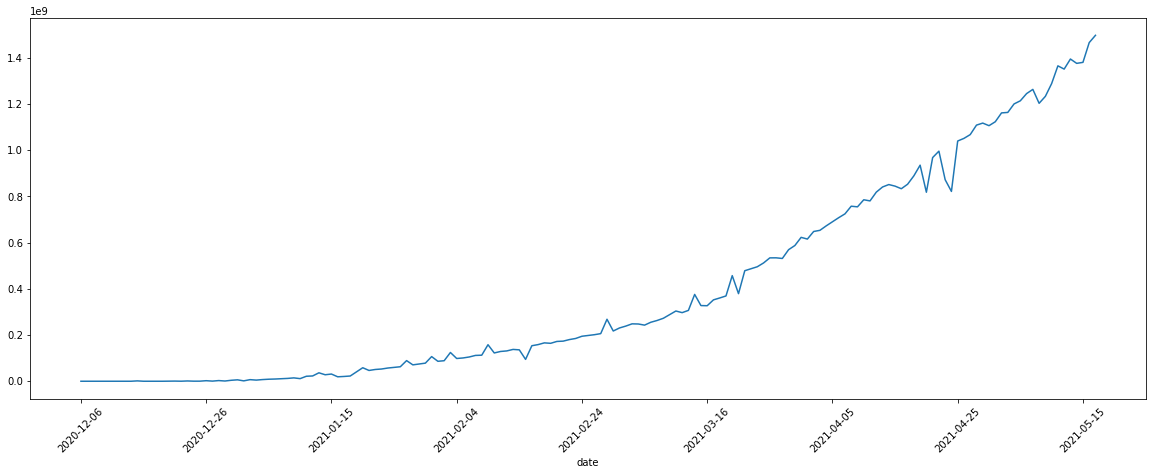

In [33]:
plt.figure(figsize=(20,7))
timeseries_cov.total_vaccinations.plot()
plt.xticks(rotation=45)
plt.show()

#### What can bee seen, is that despite some days the amount of vaccinated people falls, the vaccination has strong long uptrend.


# Timeseries transformations to make it stationary

#### Testing For Stationarity using Dickey-Fuller Test

In [34]:
from statsmodels.tsa.stattools import adfuller

In [35]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [36]:
adfuller_test(timeseries_cov['total_vaccinations'])

ADF Test Statistic : 6.240511150727797
p-value : 1.0
#Lags Used : 5
Number of Observations Used : 157
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [37]:
timeseries_cov['total_vaccinations_box'], l = scipy.stats.boxcox(timeseries_cov.total_vaccinations)

In [38]:
print(timeseries_cov)

            total_vaccinations  total_vaccinations_box
date                                                  
2020-12-06        2.000000e+00                0.751471
2020-12-07        4.000000e+00                1.632854
2020-12-08        4.000000e+00                1.632854
2020-12-09        5.000000e+00                1.947835
2020-12-10        6.000000e+00                2.217471
...                        ...                     ...
2021-05-13        1.394810e+09              547.598792
2021-05-14        1.376011e+09              545.878497
2021-05-15        1.380323e+09              546.274711
2021-05-16        1.465803e+09              553.938737
2021-05-17        1.497409e+09              556.685332

[163 rows x 2 columns]


In [39]:
print('p-value : {}'.format(sm.tsa.stattools.adfuller(timeseries_cov.drop(columns=['total_vaccinations']))[1]))

p-value : 0.010843188329114085


In [40]:
#adfuller_test(timeseries_cov['total_vaccinations_box'])

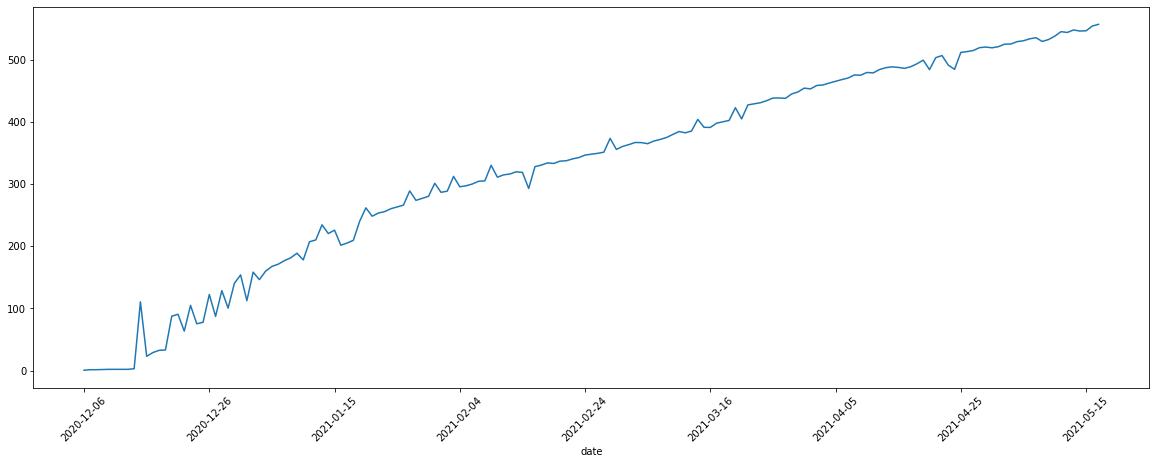

In [41]:
plt.figure(figsize=(20,7))
timeseries_cov.total_vaccinations_box.plot()
plt.xticks(rotation=45)
plt.show()

In [42]:
timeseries_cov['total_vaccinations_box_diff1int2'] = timeseries_cov.total_vaccinations_box - timeseries_cov.total_vaccinations_box.shift(2)

In [43]:
timeseries_cov['total_vaccinations_box_diff2int2'] = timeseries_cov['total_vaccinations_box_diff1int2'] - timeseries_cov['total_vaccinations_box_diff1int2'].shift(2)

In [44]:
print('p-value : {}'.format(sm.tsa.stattools.adfuller(timeseries_cov.drop(columns=['total_vaccinations', 'total_vaccinations_box', 'total_vaccinations_box_diff1int2'])[4:])[1]))

p-value : 9.511064533891963e-07


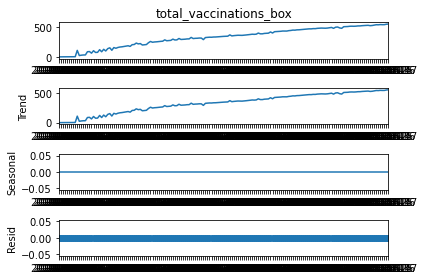

In [45]:
sm.tsa.seasonal_decompose(timeseries_cov.total_vaccinations_box, period=1).plot()
plt.show()

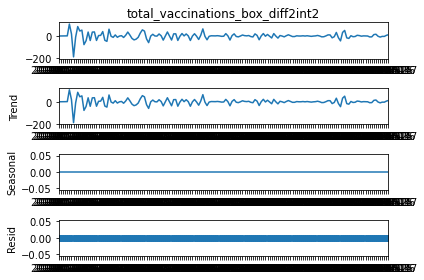

In [46]:
sm.tsa.seasonal_decompose(timeseries_cov.total_vaccinations_box_diff2int2[4:], period=1).plot()
plt.show()

## • ACF and PACF (Autocorrelation function and Partial autocorrelation function)

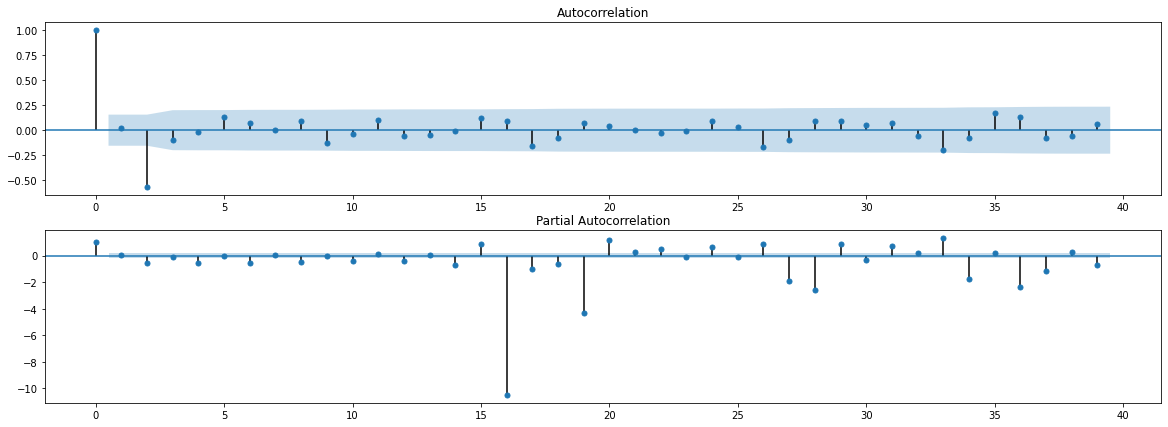

In [47]:
plt.figure(figsize=(20, 7))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(timeseries_cov.drop(columns=['total_vaccinations', 'total_vaccinations_box', 'total_vaccinations_box_diff1int2'])[4:], 
                         lags=(len(timeseries_cov)-4)/4, ax=ax)
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(timeseries_cov.drop(columns=['total_vaccinations', 'total_vaccinations_box', 'total_vaccinations_box_diff1int2'])[4:], 
                         lags=(len(timeseries_cov)-4)/4, ax=ax)
plt.show()

In [48]:
d = 0
D = 2

In [49]:
%%time
results = []
best_aic = float('inf')

parameters = list(product(np.arange(0, 7), np.arange(0, 7), np.arange(0, 7), np.arange(0, 7)))

for param in tqdm(parameters):
    try:
        arima = sm.tsa.statespace.SARIMAX(timeseries_cov.total_vaccinations_box, order=(param[0], d, param[1]), 
                                          seasonal_order=(param[2], D, param[3], 2)).fit(disp=False)
    except:
        continue
    aic = arima.aic
    if aic < best_aic:
        optimal_arima = arima
        best_aic = aic
        best_param = param
    results.append([param, optimal_arima.aic])

100%|██████████████████████████████████████████████████████████████████████████████| 2401/2401 [05:50<00:00,  6.85it/s]

Wall time: 5min 50s


In [50]:
timeseries_cov.head()

,total_vaccinations,total_vaccinations_box,total_vaccinations_box_diff1int2,total_vaccinations_box_diff2int2
date,,,,
2020-12-06,2.0,0.751471,NaN,NaN
2020-12-07,4.0,1.632854,NaN,NaN
2020-12-08,4.0,1.632854,0.881383,NaN
2020-12-09,5.0,1.947835,0.314982,NaN
2020-12-10,6.0,2.217471,0.584618,-0.296766


In [51]:
print(optimal_arima.summary())

                                     SARIMAX Results                                      
Dep. Variable:             total_vaccinations_box   No. Observations:                  163
Model:             SARIMAX(4, 0, 4)x(0, 2, [], 2)   Log Likelihood                -640.218
Date:                            Mon, 31 May 2021   AIC                           1298.435
Time:                                    18:59:33   BIC                           1326.055
Sample:                                12-06-2020   HQIC                          1309.651
                                     - 05-17-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1949      0.072     -2.696      0.007      -0.337      -0.053
ar.L2         -0.1328      0.095   

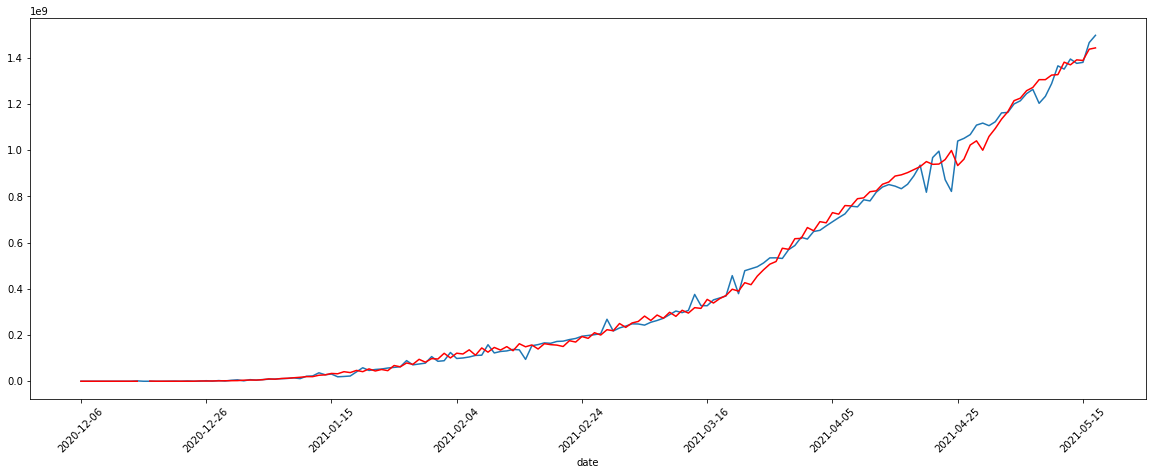

In [52]:
timeseries_cov['arima'] = invboxcox(optimal_arima.fittedvalues, l)
plt.figure(figsize=(20,7))
timeseries_cov.total_vaccinations.plot()
timeseries_cov.arima.plot(color='r')
plt.xticks(rotation=45)
plt.show()